In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)

In [3]:
# Reading Data and processing
data = pd.read_csv('./data/tag.csv',encoding='latin-1')
data.head()

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"
2,How to terminate windows phone 8.1 app,['c#']
3,get current time in a specific country via jquery,"['javascript', 'jquery']"
4,Configuring Tomcat to Use SSL,['java']


In [7]:
print(data.isnull().sum())
print(data.describe())

title    0
tags     0
dtype: int64
                                                    title      tags
count                                              100000    100000
unique                                              99984      7066
top     Conversion failed when converting date and/or ...  ['java']
freq                                                    3      7026


In [4]:
data.title.value_counts()

Conversion failed when converting date and/or time from character string    3
c# and excel automation - ending the running instance                       2
No rule to make target                                                      2
Uncaught Reference Error: function is not defined                           2
JavaScript runtime error: '$' is undefined                                  2
                                                                           ..
Saving CoreData to-many relationships in Swift                              1
determin the number of letters in a word?                                   1
Find the inner-most exception without using a while loop?                   1
Why is the MySQL database not showing in the list of datasources?           1
PHP: Database cache ( with sqlite in-memory )                               1
Name: title, Length: 99984, dtype: int64

## Data Cleaning and Lemmatization

In [8]:
import string
import re 
import nltk

# Loading Stop words adn punctuation using nltk and string
stop = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
token = nltk.tokenize.TreebankWordTokenizer()

def text_prep(text):
    # Coverting the text in to lowercase
    text = text.lower()
    
    # Recompiling and replacing the HTML tags in the data
    #for prediction
    html = re.compile('<.*?>')
    text = re.sub(html," ",text)
    
    # Treebank Tokenizer and WordNet Tokenizer
    text = "".join([w for w in text if w not in string.punctuation])
    text = re.split('\W+',text)
        
    text = [w for w in text if w not in stop]
    
    text = " ".join([wn.lemmatize(w) for w in text])
    
    return text

In [9]:
# Data Cleaning for prediction
data['title_clear'] = data['title'].apply(lambda x: text_prep(x))

In [10]:
data.head()

,title,tags,title_clear
0,How to draw a stacked dotplot in R?,['r'],draw stacked dotplot r
1,mysql select all records where a datetime fiel...,"['php', 'mysql']",mysql select record datetime field le specifie...
2,How to terminate windows phone 8.1 app,['c#'],terminate window phone 81 app
3,get current time in a specific country via jquery,"['javascript', 'jquery']",get current time specific country via jquery
4,Configuring Tomcat to Use SSL,['java'],configuring tomcat use ssl


In [11]:
# Tags data cleaning 
clgs = []
for i in data.tags:
    clgs.append(re.sub('[^A-Za-z#+-]'," ",i))

data['ctag'] = clgs

In [12]:
data.head()

,title,tags,title_clear,ctag
0,How to draw a stacked dotplot in R?,['r'],draw stacked dotplot r,r
1,mysql select all records where a datetime fiel...,"['php', 'mysql']",mysql select record datetime field le specifie...,php mysql
2,How to terminate windows phone 8.1 app,['c#'],terminate window phone 81 app,c#
3,get current time in a specific country via jquery,"['javascript', 'jquery']",get current time specific country via jquery,javascript jquery
4,Configuring Tomcat to Use SSL,['java'],configuring tomcat use ssl,java


In [13]:
# Assigning a new Dataframe fo the cleared dataset

df = pd.DataFrame(data=data[['title_clear','ctag']])
df.head()

,title_clear,ctag
0,draw stacked dotplot r,r
1,mysql select record datetime field le specifie...,php mysql
2,terminate window phone 81 app,c#
3,get current time specific country via jquery,javascript jquery
4,configuring tomcat use ssl,java


## Vectorization and Binarization

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# Selecting the tags on the basis of occurence frequency
vectorizer = CountVectorizer(max_df=0.6,tokenizer = lambda x:x.split(),binary='true')
tags = vectorizer.fit_transform(df['ctag'])

In [14]:
len(vectorizer.get_feature_names())

100

In [15]:
x = pd.DataFrame(data=vectorizer.get_feature_names(),columns=['tags_names'])

In [16]:
x.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tags_names  100 non-null    object
dtypes: object(1)
memory usage: 6.3 KB


In [17]:
# Transforming the data.ctags for wordcloud
text_feature_names = " ".join(vectorizer.get_feature_names())
text_feature_names

'ajax algorithm android angularjs apache arrays asp c c# c++ class cocoa-touch codeigniter css csv database date datetime django dom eclipse entity-framework excel facebook file forms function generics google-maps hibernate html image ios iphone java javascript jquery js json jsp laravel linq linux list loops maven mongodb multithreading mysql net net-mvc node numpy objective-c oop opencv osx pandas parsing performance php pointers python python- qt r regex rest ruby ruby-on-rails ruby-on-rails- selenium servlets session sockets sorting spring spring-mvc sql sql-server string swift swing twitter-bootstrap uitableview unit-testing validation vb visual-studio visual-studio- wcf web-services windows winforms wordpress wpf x xaml xcode xml'

## Tag interactive visualization

In [18]:
from wordcloud import WordCloud , STOPWORDS
from PIL import Image
import numpy as np

In [19]:
# Masking the image
masked_image = np.array(Image.open('ques_mask.jpg'))
print(masked_image)

[[[63 59 60]
  [63 59 60]
  [63 59 60]
  ...
  [63 59 60]
  [63 59 60]
  [63 59 60]]

 [[27 23 24]
  [27 23 24]
  [27 23 24]
  ...
  [27 23 24]
  [27 23 24]
  [27 23 24]]

 [[39 35 36]
  [39 35 36]
  [39 35 36]
  ...
  [39 35 36]
  [39 35 36]
  [39 35 36]]

 ...

 [[35 31 32]
  [35 31 32]
  [35 31 32]
  ...
  [35 31 32]
  [35 31 32]
  [35 31 32]]

 [[35 31 32]
  [35 31 32]
  [35 31 32]
  ...
  [35 31 32]
  [35 31 32]
  [35 31 32]]

 [[35 31 32]
  [35 31 32]
  [35 31 32]
  ...
  [35 31 32]
  [35 31 32]
  [35 31 32]]]


In [20]:
word_cloud_1 = WordCloud(width=1400,height=800,max_words=300,background_color='black',stopwords=STOPWORDS
                       ,random_state=0).generate(text_feature_names)

word_cloud_2 = WordCloud(width=1400,height=800,max_words=300,background_color='black',mask=masked_image,
                         stopwords=STOPWORDS,random_state=0).generate(text_feature_names)

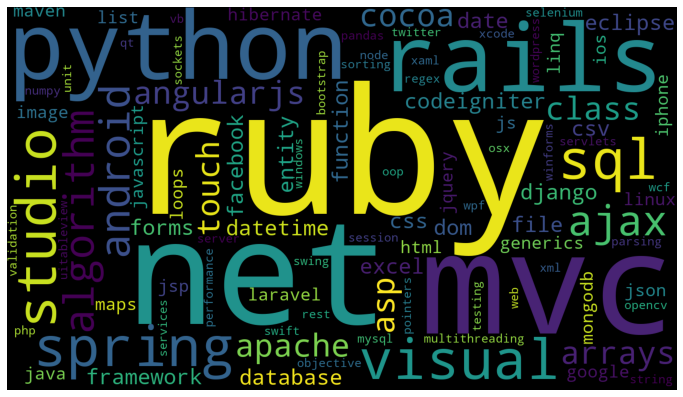

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(word_cloud_1)
plt.show()

In [22]:
# Splitting the dataset into 30% of test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['title_clear'],df['ctag'],test_size=0.3,random_state=0)

## Title Vectorization and Multioutput Model

In [23]:
tfidf = TfidfVectorizer(min_df=0.0009,max_features=200000,smooth_idf=True,norm='l2',tokenizer= lambda x:x.split(),
                        sublinear_tf=False,ngram_range=(1,3))

In [24]:
x_train_m = tfidf.fit_transform(x_train)
x_test_m = tfidf.transform(x_test)

In [25]:
vect = CountVectorizer(tokenizer= lambda x:x.split(),binary='true')

In [26]:
y_train_m = vect.fit_transform(y_train)
y_test_m = vect.transform(y_test)

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
onevsrest_svc = OneVsRestClassifier(LogisticRegression())
onevsrest_sgd = OneVsRestClassifier(SGDClassifier())

In [35]:
onevsrest_sgd.fit(x_train_m.todense(),y_train_m.todense())
print('Accuracy of OneVsRest SGD',onevsrest_sgd.score(x_train_m.todense(),y_train_m.todense()))

onevsrest_svc.fit(x_train_m.todense(),y_train_m.todense())
print('Accuracy of OneVsRest LR',onevsrest_svc.score(x_train_m.todense(),y_train_m.todense()))

Accuracy of OneVsRest SGD 0.2681428571428571


C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Accuracy of OneVsRest LR 0.28991428571428574


In [36]:
from sklearn.multioutput import MultiOutputClassifier

In [37]:
multi_svc = MultiOutputClassifier(LogisticRegression()).fit(x_train_m.todense(),y_train_m.todense())
print('Accuracy of Multioutput LR',multi_svc.score(x_train_m.todense(),y_train_m.todense()))

multi_sgd = MultiOutputClassifier(SGDClassifier()).fit(x_train_m.todense(),y_train_m.todense())
print('Accuracy of Multioutput SGD',multi_sgd.score(x_train_m.todense(),y_train_m.todense()))

C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Accuracy of Multioutput LR 0.28991428571428574
Accuracy of Multioutput SGD 0.2695142857142857
